In [713]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os

In [714]:
os.getcwd()

'/Users/welin/Desktop/GooglePlayApp'

In [715]:
gplay = pd.read_csv('/Users/welin/Desktop/GooglePlayApp/googleplaystore.csv')
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [716]:
reviews = pd.read_csv('/Users/welin/Desktop/GooglePlayApp/googleplaystore_user_reviews.csv')
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [717]:
# to get info about the attributes of the data sets

gplay.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subject

In [718]:
print('Data shape: Google Play {0} Reviews {1}'.format(gplay.shape, reviews.shape))

Data shape: Google Play (10841, 13) Reviews (64295, 5)


Let's take a closer look at some of the columns that will be used for analysis.

In [719]:
gplay['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Ops, it seems we have a tresspasser. What is Category - 1.9? It needs further investigation.

In [720]:
gplay.loc[gplay['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


3.0M and 1,000+ are the Size and the Installs for this record, and they have shifted to the left with the rest. We need to move the values in their right place. 

In [721]:
"""tried to shift the entire row from column 1 to the right but the function is being rude to me 
(always skips 19.0 (the "Reviews" cell probably issues with the data types)), still it will save me some typing"""

gplay.iloc[[10472],2:14].shift(periods=1,axis='columns')
gplay.iloc[[10472],1:14] = gplay.iloc[[10472],1:14].shift(periods=1,axis='columns')
gplay.iloc[[10472],[1,2,3,9]] = ['PHOTOGRAPHY', 1.9, 19.0, 'Photography']
gplay.iloc[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


That's better!

In [722]:
gplay[['Rating']].describe()

,Rating
count,9367.000000
mean,4.191513
std,0.515735
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [723]:
# a quick look at the Reviews column
gplay[['Reviews']].sample(15)

,Reviews
1766,37023
76,737
3261,9602
272,23175
5740,725
236,159872
24,118
491,305708
4531,39
2687,244141


In [724]:
# the most common genres
gplay['Genres'].value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

# Data cleaning<br>
We need to remove M, + and $ symbols from the respective columns

In [725]:
#getting rid of M and k in the "Size" column
gplay['Size'] = gplay['Size'].apply(lambda m: str(m).replace("M",""))
gplay['Size'] = gplay['Size'].apply(lambda k: float(str(k).replace("k",""))/1000 if 'k' in str(k) else k)
gplay.iloc[10470:10474] #there is both M and k in this slice

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,0.404,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [726]:
# Remove + and $
gplay['Installs'] = gplay['Installs'].apply(lambda x: str(x).replace("+",""))
gplay['Price'] = gplay['Price'].apply(lambda x: str(x).replace("$",""))
gplay['Installs'] = gplay['Installs'].apply(lambda x: str(x).replace(",",""))
gplay.loc[gplay['Type']=='Paid'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [727]:
# change the data type of numeric columns
gplay=gplay.astype({'Rating':'float32','Reviews':'float32','Installs':'float32','Price':'float32'})

# Missing values

Cheking for missing values

In [728]:
gplay.isnull().mean().sort_values(ascending=False)

Rating            0.135965
Current Ver       0.000738
Android Ver       0.000184
Type              0.000092
Last Updated      0.000000
Genres            0.000000
Content Rating    0.000000
Price             0.000000
Installs          0.000000
Size              0.000000
Reviews           0.000000
Category          0.000000
App               0.000000
dtype: float64

14% of the apps are not rated. Since this column will be used in the analysis, let's replace the missing values with 0

In [729]:
gplay.loc[gplay.Rating.isnull(), 'Rating'] = 0 # another way to do it -> gplay.['Rating'].fillna(0,inplace=True)
gplay.Rating.isnull().sum()

0

Since 'Size' will be used in the analysis we need to deal with the 'Varies with device' values in it.


In [730]:
float(len(gplay.loc[gplay['Size']=='Varies with device']))/float(len(gplay))

0.15635089013928605

16% of the values in the Size column == Varies with device. It will be better to impute the values instead of deleting entire records.

In [731]:
# !!!!DON'T RE replace the Varies with device string with NaN in order to interpolate
gplay.loc[gplay.Size == 'Varies with device', 'Size'] = np.nan
gplay['Size'] = gplay['Size'].astype('float32').interpolate(method='linear')

In [733]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [734]:
os.getcwd()

'/Users/welin/Desktop/GooglePlayApp'

In [735]:
# Saving the clean data 
gplay.to_csv('/Users/welin/Desktop/GooglePlayApp/cleaned_data.csv', index=False)

In [739]:
gplay_cl = pd.read_csv('/Users/welin/Desktop/GooglePlayApp/cleaned_data.csv')
gplay_cl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [738]:
gplay_cl['Installs'].median()

100000.0

## Data analysis 

!THIS CELL MUST BE AT THE BEGINNING

Question: What are the attributes of an application that would be worth investing in? 

Since we don't have any financial outlook to be able to define what "investment worthy" means in terms of the specific business objectives, let's assume that:
Number of installations in the upper quartile would (hypothetically) generate revenue that allows the project to break even in one year after launch. (too many assumptions, but for the sake of setting up a logical frame that will help us choose actionable metrics)


Define metrics that will provide insights about the attributes that point to higher number of downloads:

Rating above 4.5 (again in the upper quartile) - What kind of apps get the highest rating? 
Rating per category - Is there a category that receives above average ratings and Why?
Rating/Reviews - do more reviews mean higher rating?
Rating/Type - Do paid apps receive higher ratings or vice versa?
Number of downloads per category/per type - is there a trend? category that is most popular? how are downloads distributed between paid and free apps?
Number of reviews - What drives users to write more reviews? Where is the highest number of reviews by category/type/content rating. Do more reviews mean more downloads?
Size - is there correlation between size and number of downloads?

Reviews table - sentiment, key words...
.... more

Choose actionable KPIs (SMART)?

Inspiration: would be interesting to compare?

In [757]:
test = gplay_cl.select_dtypes(include=np.number)
test_1 = test.apply(lambda x : np.log1p(x))
test_1.head()

,Rating,Reviews,Size,Installs,Price
0,1.629241,5.075174,2.995732,9.210440,0.0
1,1.589235,6.875232,2.708050,13.122365,0.0
2,1.740466,11.379520,2.272126,15.424949,0.0
3,1.704748,12.281389,3.258097,17.727534,0.0
4,1.667707,6.875232,1.335001,11.512935,0.0


In [765]:
gplay_log = pd.concat([test_1, gplay_cl['Type']], axis=1)

# pd.concat([df1, s1], axis=1)
gplay_log.head()

,Rating,Reviews,Size,Installs,Price,Type
0,1.629241,5.075174,2.995732,9.210440,0.0,Free
1,1.589235,6.875232,2.708050,13.122365,0.0,Free
2,1.740466,11.379520,2.272126,15.424949,0.0,Free
3,1.704748,12.281389,3.258097,17.727534,0.0,Free
4,1.667707,6.875232,1.335001,11.512935,0.0,Free


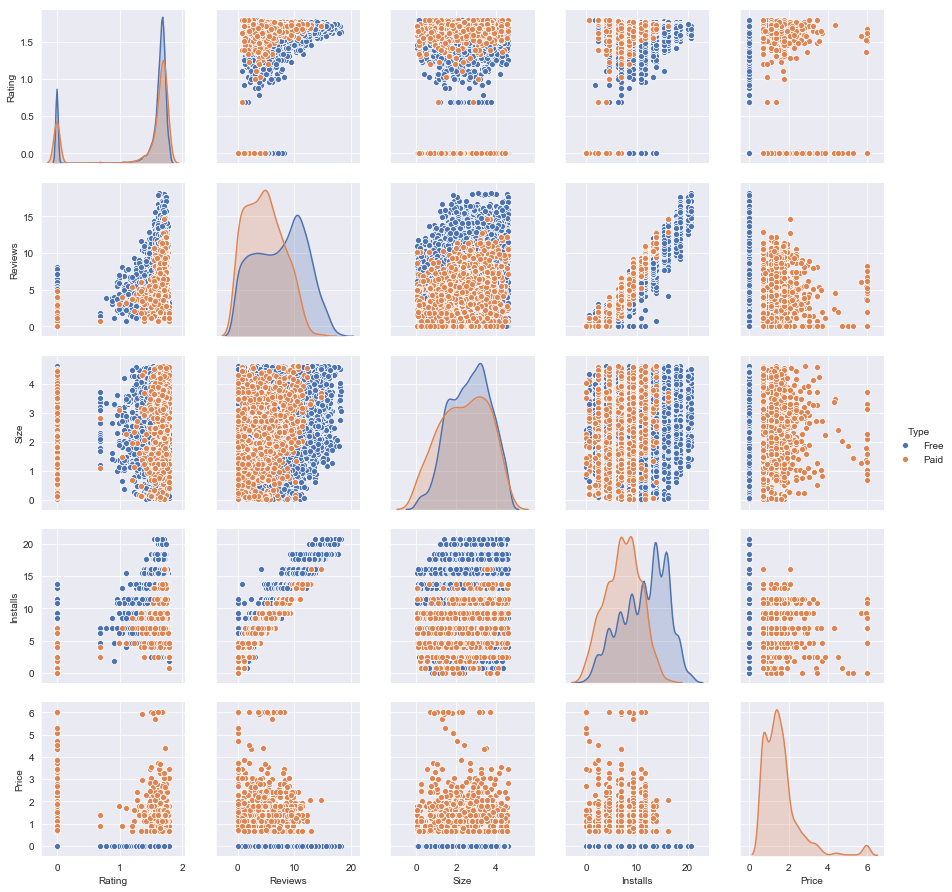

In [776]:
# Basic EDA plot to spot patterns
sns.set_style("darkgrid")
plot = sns.pairplot(gplay_log.dropna(), hue = 'Type', palette ='deep')


CHoose Columns I want to further explore - rating, reviews, size, installs, type, price, genres?
Missing values - do this
Data cleaning - remove M, $, +
Save the cleaned data in a new csv
Start with EDA
Define metrics to analyse
Select predictors, maybe for actionable KPIs?

In [809]:
# Rating above 4.5 (again in the upper quartile), this is too high maybe better go for the median?
# What kind of apps get the highest rating? 
# Are the highest rated the most downloaded?


t = gplay_cl.groupby(['Category'], as_index=False)["Rating"].mean()
t.sort_values('Rating', ascending=False).head(5)

,Category,Rating
8,EDUCATION,4.360897
0,ART_AND_DESIGN,4.156923
9,ENTERTAINMENT,4.126174
14,GAME,4.110227
5,COMICS,4.016667


In [815]:
d = gplay_cl.groupby(['Category','Genres'], as_index=False)["Rating"].mean()
d.sort_values('Rating', ascending=False).head(5)

,Category,Genres,Rating
35,FAMILY,Board;Pretend Play,4.80
9,COMICS,Comics;Creativity,4.80
69,FAMILY,Health & Fitness;Education,4.70
117,GAME,Simulation;Action & Adventure,4.70
64,FAMILY,Entertainment;Creativity,4.65
